In [102]:
import pandas as pd

In [103]:
data = pd.read_csv("fifa_players.csv")
data.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [104]:
data.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

In [105]:
data = data.drop(['national_team', 'national_rating', 'national_team_position', 
           'national_jersey_number', 'wage_euro', 'release_clause_euro', 'full_name', 'birth_date', 'international_reputation(1-5)', 
           'body_type', 'crossing', 'curve', 'reactions', 'balance', 'stamina'], axis = 1)

In [106]:
data.isnull().sum()

name                   0
age                    0
height_cm              0
weight_kgs             0
positions              0
nationality            0
overall_rating         0
potential              0
value_euro           255
preferred_foot         0
weak_foot(1-5)         0
skill_moves(1-5)       0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
freekick_accuracy      0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
shot_power             0
jumping                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
composure              0
marking                0
standing_tackle        0
sliding_tackle         0
dtype: int64

In [107]:
data = data.dropna()
data.shape

(17699, 36)

In [108]:
data['positions']

0         CF,RW,ST
1        CAM,RM,CM
2           CM,CAM
3            LW,ST
4               CB
           ...    
17949    RM,CAM,CM
17950           LB
17951           GK
17952        ST,LM
17953           ST
Name: positions, Length: 17699, dtype: object

In [109]:
# Keeping only the first position for all the players
data['positions'] = data['positions'].str.split(',').str[0]

In [110]:
data['positions'].value_counts()

CB     3038
ST     2482
CM     2128
GK     2024
CDM    1361
RB     1322
LB     1309
RM     1045
CAM    1027
LM     1017
LW      373
RW      353
CF       88
RWB      68
LWB      64
Name: positions, dtype: int64

In [111]:
# Changing "LWB" and "RWB" t0 "LB" and "RB"
data['positions'] = data['positions'].replace({'LWB': 'LB', 'RWB' : 'RB'})
data['positions'].value_counts()

CB     3038
ST     2482
CM     2128
GK     2024
RB     1390
LB     1373
CDM    1361
RM     1045
CAM    1027
LM     1017
LW      373
RW      353
CF       88
Name: positions, dtype: int64

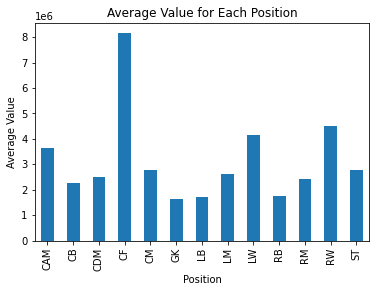

In [112]:
import matplotlib.pyplot as plt
average_values = data.groupby('positions')['value_euro'].mean().reset_index()

# Create a bar plot
average_values.plot(kind='bar', x='positions', y='value_euro', legend=False)
plt.title('Average Value for Each Position')
plt.xlabel('Position')
plt.ylabel('Average Value')
plt.show()

It is evident that the attacking positions have a much higher market value compared to the rest. They are followed by Midfielders, followed by Defenders and finally Goalkeepers

<big>Seperating the datasets based on the player positions</big>

In [113]:
att = ['CF', 'ST', 'LW', 'RW']
mid = ['CAM', 'CM', 'LM', 'RM', 'CDM']
defe = ['CB', 'LB', 'RB']
gk = ['GK']

att_dataset = data[data['positions'].apply(lambda x: any(pos in x for pos in att))]
mid_dataset = data[data['positions'].apply(lambda x: any(pos in x for pos in mid))]
def_dataset = data[data['positions'].apply(lambda x: any(pos in x for pos in defe))]
gk_dataset = data[data['positions'].apply(lambda x: any(pos in x for pos in gk))]

Now that we have different datasets for each of the positions, we will work on them sepertely

Attackers

In [114]:
att_dataset.head()

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,31,170.18,72.1,CF,Argentina,94,94,110500000.0,Left,...,94,48,22,94,94,75,96,33,28,26
3,L. Insigne,27,162.56,59.0,LW,Italy,88,88,62000000.0,Right,...,84,34,26,83,87,61,83,51,24,22
6,K. Mbappé,20,152.40,73.0,RW,France,88,95,81000000.0,Right,...,78,62,38,88,82,70,86,34,34,32
7,S. Agüero,30,172.72,69.9,ST,Argentina,89,89,64500000.0,Right,...,83,65,24,92,83,83,90,30,20,12
9,E. Cavani,32,185.42,77.1,ST,Uruguay,89,89,60000000.0,Right,...,79,84,48,93,77,85,82,52,45,39


In [115]:
att_dataset.columns

Index(['name', 'age', 'height_cm', 'weight_kgs', 'positions', 'nationality',
       'overall_rating', 'potential', 'value_euro', 'preferred_foot',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'shot_power', 'jumping', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

In [116]:
att_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3296 entries, 0 to 17953
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               3296 non-null   object 
 1   age                3296 non-null   int64  
 2   height_cm          3296 non-null   float64
 3   weight_kgs         3296 non-null   float64
 4   positions          3296 non-null   object 
 5   nationality        3296 non-null   object 
 6   overall_rating     3296 non-null   int64  
 7   potential          3296 non-null   int64  
 8   value_euro         3296 non-null   float64
 9   preferred_foot     3296 non-null   object 
 10  weak_foot(1-5)     3296 non-null   int64  
 11  skill_moves(1-5)   3296 non-null   int64  
 12  finishing          3296 non-null   int64  
 13  heading_accuracy   3296 non-null   int64  
 14  short_passing      3296 non-null   int64  
 15  volleys            3296 non-null   int64  
 16  dribbling          3296

In [117]:
data['nationality'].value_counts()

England                 1655
Germany                 1199
Spain                   1070
France                   924
Argentina                904
                        ... 
Malta                      1
Papua New Guinea           1
South Sudan                1
Yemen                      1
United Arab Emirates       1
Name: nationality, Length: 159, dtype: int64

In [118]:
att_dataset = att_dataset.drop(['name'], axis = 1)
att_dataset.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,weak_foot(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,31,170.18,72.1,CF,Argentina,94,94,110500000.0,Left,4,...,94,48,22,94,94,75,96,33,28,26
3,27,162.56,59.0,LW,Italy,88,88,62000000.0,Right,4,...,84,34,26,83,87,61,83,51,24,22
6,20,152.40,73.0,RW,France,88,95,81000000.0,Right,4,...,78,62,38,88,82,70,86,34,34,32
7,30,172.72,69.9,ST,Argentina,89,89,64500000.0,Right,4,...,83,65,24,92,83,83,90,30,20,12
9,32,185.42,77.1,ST,Uruguay,89,89,60000000.0,Right,4,...,79,84,48,93,77,85,82,52,45,39


In [119]:
# Label Encoding the nationality column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

att_dataset['nationality'] = le.fit_transform(att_dataset['nationality'])
att_dataset.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,weak_foot(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,31,170.18,72.1,CF,4,94,94,110500000.0,Left,4,...,94,48,22,94,94,75,96,33,28,26
3,27,162.56,59.0,LW,62,88,88,62000000.0,Right,4,...,84,34,26,83,87,61,83,51,24,22
6,20,152.40,73.0,RW,46,88,95,81000000.0,Right,4,...,78,62,38,88,82,70,86,34,34,32
7,30,172.72,69.9,ST,4,89,89,64500000.0,Right,4,...,83,65,24,92,83,83,90,30,20,12
9,32,185.42,77.1,ST,122,89,89,60000000.0,Right,4,...,79,84,48,93,77,85,82,52,45,39


In [120]:
# Label encoding the positions column

att_dataset['positions'] = le.fit_transform(att_dataset['positions'])
att_dataset.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,weak_foot(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,31,170.18,72.1,0,4,94,94,110500000.0,Left,4,...,94,48,22,94,94,75,96,33,28,26
3,27,162.56,59.0,1,62,88,88,62000000.0,Right,4,...,84,34,26,83,87,61,83,51,24,22
6,20,152.40,73.0,2,46,88,95,81000000.0,Right,4,...,78,62,38,88,82,70,86,34,34,32
7,30,172.72,69.9,3,4,89,89,64500000.0,Right,4,...,83,65,24,92,83,83,90,30,20,12
9,32,185.42,77.1,3,122,89,89,60000000.0,Right,4,...,79,84,48,93,77,85,82,52,45,39


In [121]:
att_dataset = pd.get_dummies(att_dataset, columns=['preferred_foot'], prefix='pref')
att_dataset['right_foot'] = att_dataset['pref_Right'].astype(int)
att_dataset = att_dataset.drop(['pref_Right', 'pref_Left'], axis = 1)
att_dataset.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,weak_foot(1-5),skill_moves(1-5),...,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,right_foot
0,31,170.18,72.1,0,4,94,94,110500000.0,4,4,...,48,22,94,94,75,96,33,28,26,0
3,27,162.56,59.0,1,62,88,88,62000000.0,4,4,...,34,26,83,87,61,83,51,24,22,1
6,20,152.40,73.0,2,46,88,95,81000000.0,4,5,...,62,38,88,82,70,86,34,34,32,1
7,30,172.72,69.9,3,4,89,89,64500000.0,4,4,...,65,24,92,83,83,90,30,20,12,1
9,32,185.42,77.1,3,122,89,89,60000000.0,4,3,...,84,48,93,77,85,82,52,45,39,1


In [122]:
att_dataset.columns

Index(['age', 'height_cm', 'weight_kgs', 'positions', 'nationality',
       'overall_rating', 'potential', 'value_euro', 'weak_foot(1-5)',
       'skill_moves(1-5)', 'finishing', 'heading_accuracy', 'short_passing',
       'volleys', 'dribbling', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'shot_power',
       'jumping', 'strength', 'long_shots', 'aggression', 'interceptions',
       'positioning', 'vision', 'penalties', 'composure', 'marking',
       'standing_tackle', 'sliding_tackle', 'right_foot'],
      dtype='object')

In [123]:
att_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3296 entries, 0 to 17953
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3296 non-null   int64  
 1   height_cm          3296 non-null   float64
 2   weight_kgs         3296 non-null   float64
 3   positions          3296 non-null   int32  
 4   nationality        3296 non-null   int32  
 5   overall_rating     3296 non-null   int64  
 6   potential          3296 non-null   int64  
 7   value_euro         3296 non-null   float64
 8   weak_foot(1-5)     3296 non-null   int64  
 9   skill_moves(1-5)   3296 non-null   int64  
 10  finishing          3296 non-null   int64  
 11  heading_accuracy   3296 non-null   int64  
 12  short_passing      3296 non-null   int64  
 13  volleys            3296 non-null   int64  
 14  dribbling          3296 non-null   int64  
 15  freekick_accuracy  3296 non-null   int64  
 16  long_passing       3296

Train Test split


In [124]:
from sklearn.model_selection import train_test_split

X = att_dataset.drop(["value_euro"], axis = 1)
y = att_dataset['value_euro']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2636, 34)
(660, 34)
(2636,)
(660,)


In [125]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=3, reg_lambda=1,random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)


# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 170544.3673051314
Mean Squared Error: 421823758965.6996
Root Mean Squared Error: 649479.6062738996
R-squared: 0.9904118671052533


Midfielders Dataset

In [126]:
mid_dataset.head()

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
1,C. Eriksen,27,154.94,76.2,CAM,Denmark,88,89,69500000.0,Right,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,25,190.50,83.9,CM,France,88,91,73000000.0,Right,...,82,78,64,82,88,82,87,63,67,67
10,Sergio Busquets,30,187.96,76.2,CDM,Spain,89,89,51500000.0,Right,...,54,85,87,77,87,60,93,90,86,80
15,P. Dybala,25,152.40,74.8,CAM,Argentina,89,94,89000000.0,Left,...,88,48,32,84,87,86,84,23,20,20
17,Fernandinho,33,152.40,67.1,CDM,Brazil,87,87,20500000.0,Right,...,78,87,89,70,75,61,79,87,86,80


In [127]:
# Dropping the name 
mid_dataset = mid_dataset.drop(['name'], axis=1)
mid_dataset.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,weak_foot(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
1,27,154.94,76.2,CAM,Denmark,88,89,69500000.0,Right,5,...,89,46,56,84,91,67,88,59,57,22
2,25,190.50,83.9,CM,France,88,91,73000000.0,Right,4,...,82,78,64,82,88,82,87,63,67,67
10,30,187.96,76.2,CDM,Spain,89,89,51500000.0,Right,3,...,54,85,87,77,87,60,93,90,86,80
15,25,152.40,74.8,CAM,Argentina,89,94,89000000.0,Left,3,...,88,48,32,84,87,86,84,23,20,20
17,33,152.40,67.1,CDM,Brazil,87,87,20500000.0,Right,4,...,78,87,89,70,75,61,79,87,86,80


In [128]:
# We have label encode positions and nationality
mid_dataset['positions'] = le.fit_transform(mid_dataset['positions'])
mid_dataset['nationality'] = le.fit_transform(mid_dataset['nationality'])
mid_dataset.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,weak_foot(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
1,27,154.94,76.2,0,37,88,89,69500000.0,Right,5,...,89,46,56,84,91,67,88,59,57,22
2,25,190.50,83.9,2,47,88,91,73000000.0,Right,4,...,82,78,64,82,88,82,87,63,67,67
10,30,187.96,76.2,1,112,89,89,51500000.0,Right,3,...,54,85,87,77,87,60,93,90,86,80
15,25,152.40,74.8,0,5,89,94,89000000.0,Left,3,...,88,48,32,84,87,86,84,23,20,20
17,33,152.40,67.1,1,16,87,87,20500000.0,Right,4,...,78,87,89,70,75,61,79,87,86,80


In [129]:
# Applying ohe on preferred foot
mid_dataset = pd.get_dummies(mid_dataset, columns=['preferred_foot'], prefix='pref')
mid_dataset['right_foot'] = mid_dataset['pref_Right'].astype(int)
mid_dataset = mid_dataset.drop(['pref_Right', 'pref_Left'], axis = 1)
mid_dataset.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,weak_foot(1-5),skill_moves(1-5),...,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,right_foot
1,27,154.94,76.2,0,37,88,89,69500000.0,5,4,...,46,56,84,91,67,88,59,57,22,1
2,25,190.50,83.9,2,47,88,91,73000000.0,4,5,...,78,64,82,88,82,87,63,67,67,1
10,30,187.96,76.2,1,112,89,89,51500000.0,3,3,...,85,87,77,87,60,93,90,86,80,1
15,25,152.40,74.8,0,5,89,94,89000000.0,3,4,...,48,32,84,87,86,84,23,20,20,0
17,33,152.40,67.1,1,16,87,87,20500000.0,4,3,...,87,89,70,75,61,79,87,86,80,1


In [130]:
X = mid_dataset.drop(["value_euro"], axis = 1)
y = mid_dataset['value_euro']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5262, 34)
(1316, 34)
(5262,)
(1316,)


In [131]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=3, reg_lambda=1,random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)


# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 203369.44716423986
Mean Squared Error: 703370559839.6284
Root Mean Squared Error: 838671.9023787719
R-squared: 0.9790870537657322


Defenders Dataset

In [132]:
def_dataset.head()

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
4,K. Koulibaly,27,187.96,88.9,CB,Senegal,88,91,60000000.0,Right,...,15,87,88,24,49,33,80,91,88,87
5,V. van Dijk,27,193.04,92.1,CB,Netherlands,88,90,59500000.0,Right,...,64,82,88,41,60,62,87,90,89,84
16,M. Škriniar,24,187.96,79.8,CB,Slovakia,86,93,53500000.0,Right,...,30,86,86,30,57,56,81,92,89,84
20,J. Vertonghen,31,187.96,86.2,CB,Belgium,87,87,34000000.0,Left,...,66,84,89,60,68,66,83,89,87,88
22,Marcelo,30,175.26,79.8,LB,Brazil,87,87,36500000.0,Left,...,70,84,83,85,82,59,86,71,82,83


In [133]:
def_dataset = def_dataset.drop(['name'], axis = 1)
def_dataset.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,weak_foot(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
4,27,187.96,88.9,CB,Senegal,88,91,60000000.0,Right,3,...,15,87,88,24,49,33,80,91,88,87
5,27,193.04,92.1,CB,Netherlands,88,90,59500000.0,Right,3,...,64,82,88,41,60,62,87,90,89,84
16,24,187.96,79.8,CB,Slovakia,86,93,53500000.0,Right,4,...,30,86,86,30,57,56,81,92,89,84
20,31,187.96,86.2,CB,Belgium,87,87,34000000.0,Left,3,...,66,84,89,60,68,66,83,89,87,88
22,30,175.26,79.8,LB,Brazil,87,87,36500000.0,Left,4,...,70,84,83,85,82,59,86,71,82,83


In [134]:
# Applying Label Encoding on the postions and nationality colums

def_dataset['positions'] = le.fit_transform(def_dataset['positions'])
def_dataset['nationality'] = le.fit_transform(def_dataset['nationality'])
def_dataset.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,weak_foot(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
4,27,187.96,88.9,0,110,88,91,60000000.0,Right,3,...,15,87,88,24,49,33,80,91,88,87
5,27,193.04,92.1,0,91,88,90,59500000.0,Right,3,...,64,82,88,41,60,62,87,90,89,84
16,24,187.96,79.8,0,113,86,93,53500000.0,Right,4,...,30,86,86,30,57,56,81,92,89,84
20,31,187.96,86.2,0,11,87,87,34000000.0,Left,3,...,66,84,89,60,68,66,83,89,87,88
22,30,175.26,79.8,1,16,87,87,36500000.0,Left,4,...,70,84,83,85,82,59,86,71,82,83


In [135]:
# applying ohe to the preferred_foot column
def_dataset = pd.get_dummies(def_dataset, columns=['preferred_foot'], prefix='pref')
def_dataset['right_foot'] = def_dataset['pref_Right'].astype(int)
def_dataset = def_dataset.drop(['pref_Right', 'pref_Left'], axis = 1)
def_dataset.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,weak_foot(1-5),skill_moves(1-5),...,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,right_foot
4,27,187.96,88.9,0,110,88,91,60000000.0,3,2,...,87,88,24,49,33,80,91,88,87,1
5,27,193.04,92.1,0,91,88,90,59500000.0,3,2,...,82,88,41,60,62,87,90,89,84,1
16,24,187.96,79.8,0,113,86,93,53500000.0,4,2,...,86,86,30,57,56,81,92,89,84,1
20,31,187.96,86.2,0,11,87,87,34000000.0,3,3,...,84,89,60,68,66,83,89,87,88,0
22,30,175.26,79.8,1,16,87,87,36500000.0,4,5,...,84,83,85,82,59,86,71,82,83,0


In [136]:
X = def_dataset.drop(["value_euro"], axis = 1)
y = def_dataset['value_euro']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4640, 34)
(1161, 34)
(4640,)
(1161,)


In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=3, reg_lambda=1,random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)


# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 148807.19991100748
Mean Squared Error: 327964651454.5083
Root Mean Squared Error: 572681.9810806939
R-squared: 0.9815337271853453


GK Dataset

In [138]:
gk_dataset.head()

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
8,M. Neuer,32,193.04,92.1,GK,Germany,89,89,38000000.0,Right,...,16,29,30,12,70,47,70,17,10,11
11,T. Courtois,26,198.12,96.2,GK,Belgium,89,90,53500000.0,Left,...,17,23,15,13,44,27,66,20,18,16
12,M. ter Stegen,26,187.96,84.8,GK,Germany,89,92,58000000.0,Right,...,10,43,22,11,70,25,70,25,13,10
27,K. Navas,32,185.42,79.8,GK,Costa Rica,87,87,30500000.0,Right,...,13,32,20,16,68,25,67,28,14,14
32,Kepa,24,185.42,84.8,GK,Spain,84,90,31000000.0,Right,...,14,18,21,15,55,24,63,19,18,16


In [139]:
gk_dataset = gk_dataset.drop(['name'], axis = 1)
gk_dataset.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,weak_foot(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
8,32,193.04,92.1,GK,Germany,89,89,38000000.0,Right,4,...,16,29,30,12,70,47,70,17,10,11
11,26,198.12,96.2,GK,Belgium,89,90,53500000.0,Left,2,...,17,23,15,13,44,27,66,20,18,16
12,26,187.96,84.8,GK,Germany,89,92,58000000.0,Right,4,...,10,43,22,11,70,25,70,25,13,10
27,32,185.42,79.8,GK,Costa Rica,87,87,30500000.0,Right,3,...,13,32,20,16,68,25,67,28,14,14
32,24,185.42,84.8,GK,Spain,84,90,31000000.0,Right,4,...,14,18,21,15,55,24,63,19,18,16


In [140]:
# Applying Label Encoding on the postions and nationality colums

gk_dataset['positions'] = le.fit_transform(gk_dataset['positions'])
gk_dataset['nationality'] = le.fit_transform(gk_dataset['nationality'])
gk_dataset.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,weak_foot(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
8,32,193.04,92.1,0,36,89,89,38000000.0,Right,4,...,16,29,30,12,70,47,70,17,10,11
11,26,198.12,96.2,0,6,89,90,53500000.0,Left,2,...,17,23,15,13,44,27,66,20,18,16
12,26,187.96,84.8,0,36,89,92,58000000.0,Right,4,...,10,43,22,11,70,25,70,25,13,10
27,32,185.42,79.8,0,18,87,87,30500000.0,Right,3,...,13,32,20,16,68,25,67,28,14,14
32,24,185.42,84.8,0,81,84,90,31000000.0,Right,4,...,14,18,21,15,55,24,63,19,18,16


In [141]:
# applying ohe to the preferred_foot column
gk_dataset = pd.get_dummies(gk_dataset, columns=['preferred_foot'], prefix='pref')
gk_dataset['right_foot'] = gk_dataset['pref_Right'].astype(int)
gk_dataset = gk_dataset.drop(['pref_Right', 'pref_Left'], axis = 1)
gk_dataset.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,weak_foot(1-5),skill_moves(1-5),...,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,right_foot
8,32,193.04,92.1,0,36,89,89,38000000.0,4,1,...,29,30,12,70,47,70,17,10,11,1
11,26,198.12,96.2,0,6,89,90,53500000.0,2,1,...,23,15,13,44,27,66,20,18,16,0
12,26,187.96,84.8,0,36,89,92,58000000.0,4,1,...,43,22,11,70,25,70,25,13,10,1
27,32,185.42,79.8,0,18,87,87,30500000.0,3,1,...,32,20,16,68,25,67,28,14,14,1
32,24,185.42,84.8,0,81,84,90,31000000.0,4,1,...,18,21,15,55,24,63,19,18,16,1


In [144]:
X = gk_dataset.drop(["value_euro"], axis = 1)
y = gk_dataset['value_euro']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1619, 34)
(405, 34)
(1619,)
(405,)


In [145]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=3, reg_lambda=1,random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)


# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 229763.4097318673
Mean Squared Error: 665246921346.4253
Root Mean Squared Error: 815626.7046550311
R-squared: 0.9801984361641701
